# Agglomerative clustering

In [1]:
import pandas as pd

In [20]:
raw = pd.read_csv("WholesaleCustomersData.csv")

In [21]:
raw.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
raw['Grocery_Frozen'] = raw['Grocery'] + raw['Frozen'] + raw['Detergents_Paper']
raw['Edibles'] = raw['Fresh'] + raw['Milk'] + raw['Delicassen']

In [23]:
raw.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Grocery_Frozen,Edibles
0,2,3,12669,9656,7561,214,2674,1338,10449,23663
1,2,3,7057,9810,9568,1762,3293,1776,14623,18643
2,2,3,6353,8808,7684,2405,3516,7844,13605,23005
3,1,3,13265,1196,4221,6404,507,1788,11132,16249
4,2,3,22615,5410,7198,3915,1777,5185,12890,33210


In [24]:
raw.isnull().sum()
X = raw.copy()

In [25]:
X = raw.iloc[:,[8,9]].values

In [26]:
X.shape

(440, 2)

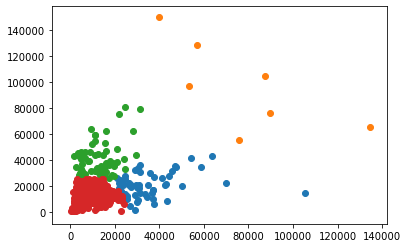

In [74]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

model = KMeans(n_clusters=4)
yhat = model.fit_predict(X)


clusters = unique(yhat)

for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
pyplot.show()

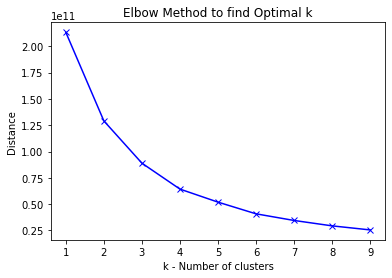

In [75]:
distances = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(X)
    distances.append(model.inertia_)
    
plt.plot(K, distances, 'bx-')
plt.xlabel('k - Number of clusters')
plt.ylabel('Distance')
plt.title('Elbow Method to find Optimal k')
plt.show()

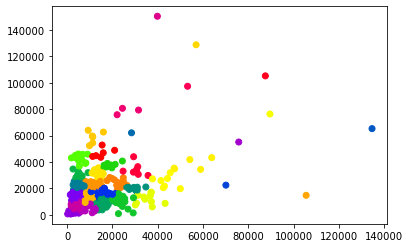

In [12]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='prism')  
plt.show()

Number of Clusters:  33


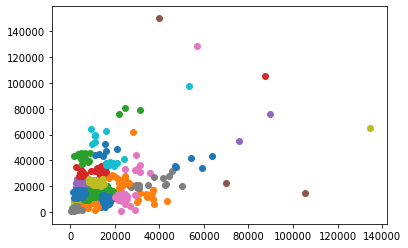

In [65]:
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics  
from numpy import where
from matplotlib import pyplot
  
model = AffinityPropagation(max_iter=200)

yhat = model.fit_predict(X)

clusters = unique(yhat)
print("Number of Clusters: ", len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

In [48]:
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
  

# Compute Affinity Propagation 
model = AffinityPropagation(max_iter=200, damping=0.5).fit(X) 
cluster_centers_indices = model.cluster_centers_indices_ 
labels = model.labels_ 
  
n_clusters_ = len(cluster_centers_indices) 
print(n_clusters_)

33


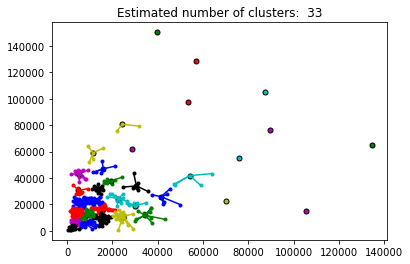

In [49]:
# Plot result 
import matplotlib.pyplot as plt 
from itertools import cycle 
  
plt.close('all') 
plt.figure(1) 
plt.clf() 
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk') 
  
for k, col in zip(range(n_clusters_), colors): 
    class_members = labels == k 
    cluster_center = X[cluster_centers_indices[k]] 
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.') 
    plt.plot(cluster_center[0], cluster_center[1], 'o', 
             markerfacecolor = col, markeredgecolor ='k', 
             markersize = 5) 
  
    for x in X[class_members]: 
        plt.plot([cluster_center[0], x[0]],[cluster_center[1], x[1]], col) 


plt.title('Estimated number of clusters: % d' % n_clusters_) 
plt.show() 